In [19]:
import numpy as np
from scipy.linalg import norm
import matplotlib.pyplot as plt

In [6]:
##Consigna 2
##Calculo las normas de A1 y A2 elevados de 1 a 250

In [10]:
#Defino la matriz A1
A1 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.303, 0.256, 0.323, 0.225, 0.257]
])

#Defino la matriz A2

A2 = np.array([
    [0.186, 0.521, 0.014, 0.32, 0.134],
    [0.24, 0.073, 0.219, 0.013, 0.327],
    [0.098, 0.12, 0.311, 0.302, 0.208],
    [0.173, 0.03, 0.133, 0.14, 0.074],
    [0.003, 0.256, 0.323, 0.225, 0.257]
])


In [16]:
I = np.eye(5)
#Defino las listas de normas
a1 = []
a2 = []
Ak1 = I
Ak2 = I
for i in range(250):
    Ak1 = A1 @ Ak1
    a1.append(norm(Ak1, 2))
    
    Ak2 = A2 @ Ak2
    a2.append(norm(Ak2, 2))
    


In [20]:
arr=np.arange(1,251)

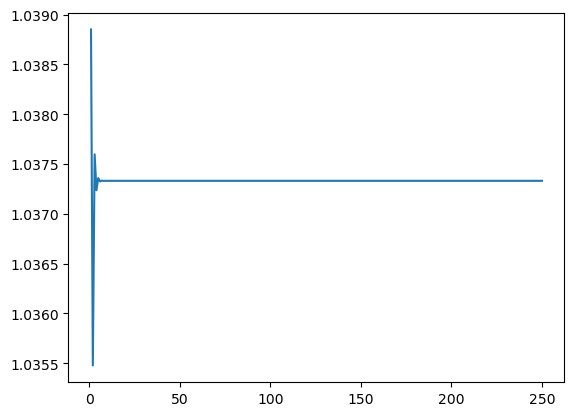

In [21]:
plt.plot(arr, a1)

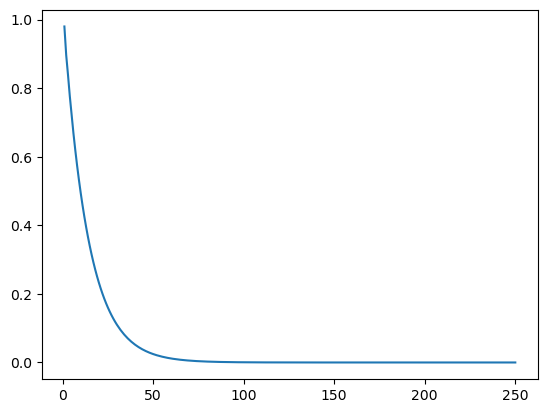

In [22]:
plt.plot(arr, a2)